<a href="https://colab.research.google.com/github/JRcepeda/Credit-Score-WOE/blob/main/Credit_Scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pingouin

In [ ]:
#manipulación de datos
import pandas as pd
import numpy as np
#inferencia estadística
import pingouin as pg
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#modelado y evaluación
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#omitir advertencias
import warnings
warnings.filterwarnings('ignore')
#conexión a carpeta de drive
from google.colab import drive
drive.mount('/content/drive')
#estilo de ggplot para gráficos de matplotlib
plt.style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Entendimiento del problema de negocio**
Finanplus es una compañía de crédito con más de 30 años de trayectoria. La compañía había estado llevando sus procesos de manera muy tradicional, sin embargo, con el constante crecimiento del sector ha visto la necesidad ha decidido intentar mejorar la eficiencia en la otorgación de créditos a través de la analítica de negocios. Para ello ha solicitado la creación de un modelo que permita obtener el puntaje de crédito (scorecard) de cada persona que solicite un crédito y así, dar una respuesta más rápida respecto al otorgamiento del crédito. El modelo deberá calcular la probabilidad de que un prestatario no cumpla con su pago y asignar un puntaje que mide el riesgo de incumplimiento de la persona.
Finanplus ha dado al equipo de analítica un conjunto de datos con el que se debe elaborar el modelo que permita satisfacer la necesidad actual de la compañía.


##**Objetivos.**
### **General.**
 Mejorar la eficiencia de la asignación de créditos de Finanplus a través de un modelo de aprendizaje de máquina.
### **Especificos.**
* Crear un modelo que automatice el cálculo de la probabilidad de incumplimiento de un solicitante de crédito.
* Crear una función que convierta la probabilidad de incumplimiento de un solicitante en un puntaje crediticio.
* Definir segmentos con base en el puntaje crediticio, para ortorgar créditos.


# **Entendimiento de los datos.**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Programación de computadores/Proyecto/credit_risk_dataset.csv')

In [ ]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


In [ ]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000



## Variables.

* person_age: edad.
* person_income: Ingreso anual.
* person_home_ownership:	Propiedad de la vivienda.
* person_emp_length:		Duración del empleo (en años).
* loan_intent: 	Intención de préstamo.
* loan_grade: 	Grado de préstamo.
* loan_amnt:		Monto del préstamo.
* loan_int_rate:	Tasa de interés.
* loan_status: Estado de préstamo 0 pago, 1 no pago. (variable de pronóstico)
* loan_percent_income:	Porcentaje de ingresos.
* cb_person_default_on_file: Incumplimiento histórico.
* cb_preson_cred_hist_length:	Duración del historial crediticio.

El conjunto de datos está compuesto por 32.581 con 12 variables. El conjunto de datos tiene 7 variables de tipo numérico y 5 variables categóricas.

In [ ]:
variables_num=['person_age', 'person_income',
       'person_emp_length',   'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']

In [ ]:
len(variables_num)

7

In [ ]:
#datos vacios
(df.isna().sum()/len(df))*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


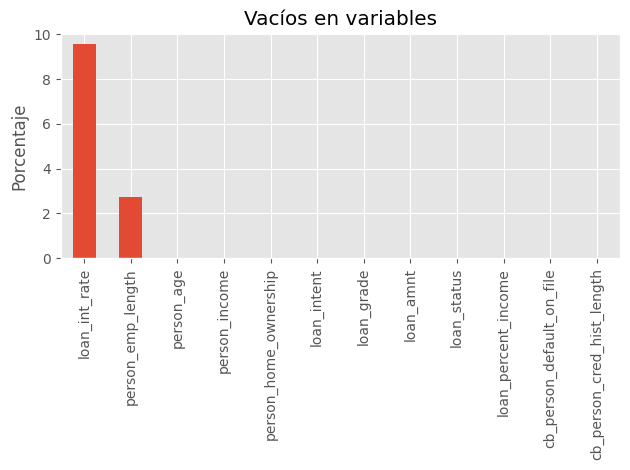

In [ ]:
((df.isna().sum()/len(df))*100).sort_values(ascending=False).plot(kind='bar',title='Vacíos en variables')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Del conjunto de datos solo dos variables tienen valores vacios. La tasa de interés del préstamo (loan_int_rate), tiene 9.56% de registros vacios y la antigüedad de las personas en el empleo (person_emp_lenght) tiene 2.74% de registros vacios.

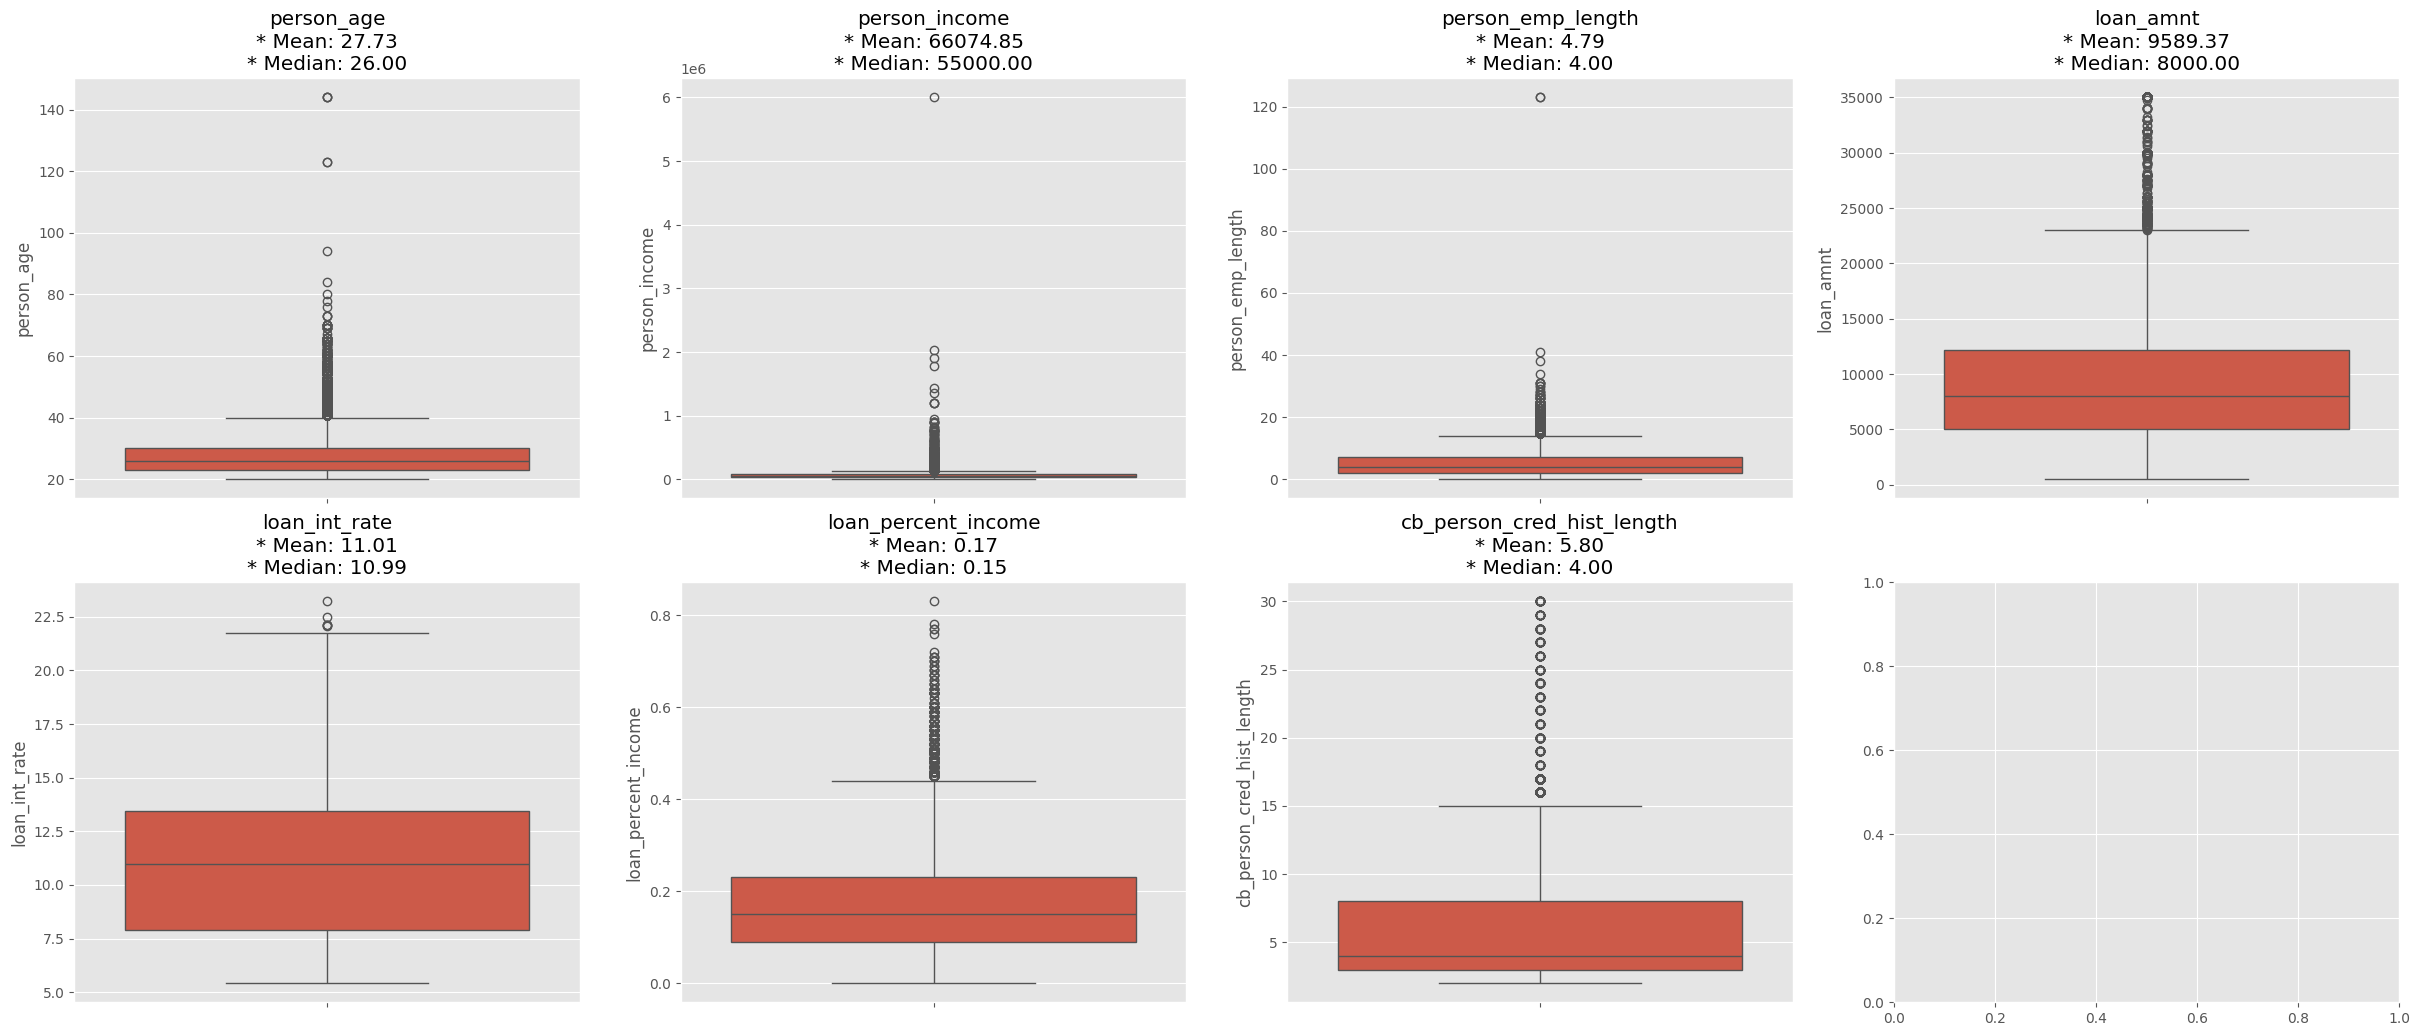

<Figure size 1000x1000 with 0 Axes>

In [ ]:
row=2
col=4
fig,ax=plt.subplots(row,col,figsize=(30,12))
plt.figure(figsize=(10,10))
for j,i in enumerate(variables_num):
  sns.boxplot(y=df[i],ax=ax[int(j/col),(j%col)])
  ax[int(j/col),(j%col)].set_title(f"{i}\n* Mean: {df[i].mean():.2f}\n* Median: {df[i].median():.2f}")
  ax[int(j/col),(j%col)].set_xlabel(None)

plt.tight_layout()
plt.show()

Para las variables numéricas, se observa que la edad promedio de los solicitantes es de 27.73 años, con una mediana de 26 años. La mayoría tiene entre 20 y 40 años, aunque existen valores atípicos que superan los 80 años. En cuanto al ingreso anual, el promedio es de \$66.074 y la mediana es de \$55.000. La duración promedio en el empleo actual es de 4.79 años, con una mediana de 4 años, destacándose valores extremos superiores a los 40 años, cabe señalar que, el valor máximo de la variable (123) indica un posible dato erróneo. Respecto al monto del préstamo solicitado, este presenta un promedio de \$9.589 y una mediana de $8.000 con valores mayoritarios entre \$5.000 y \$15.000, aunque algunos alcanzan los \$30.000 o más. La tasa de interés promedio es del 11.01%, con una mediana de 10.99%, y su distribución es relativamente simétrica, oscilando entre el 7% y el 15%. Además, el porcentaje del ingreso anual comprometido para el préstamo tiene un promedio de 17% y una mediana de 15%, con valores atípicos que superan el 50%, lo que puede indicar un mayor riesgo financiero. Finalmente, la duración promedio del historial crediticio es de 5.80 años, con una mediana de 4 años, y presenta valores extremos superiores a 20 años.

In [ ]:
categoricas=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','loan_status']

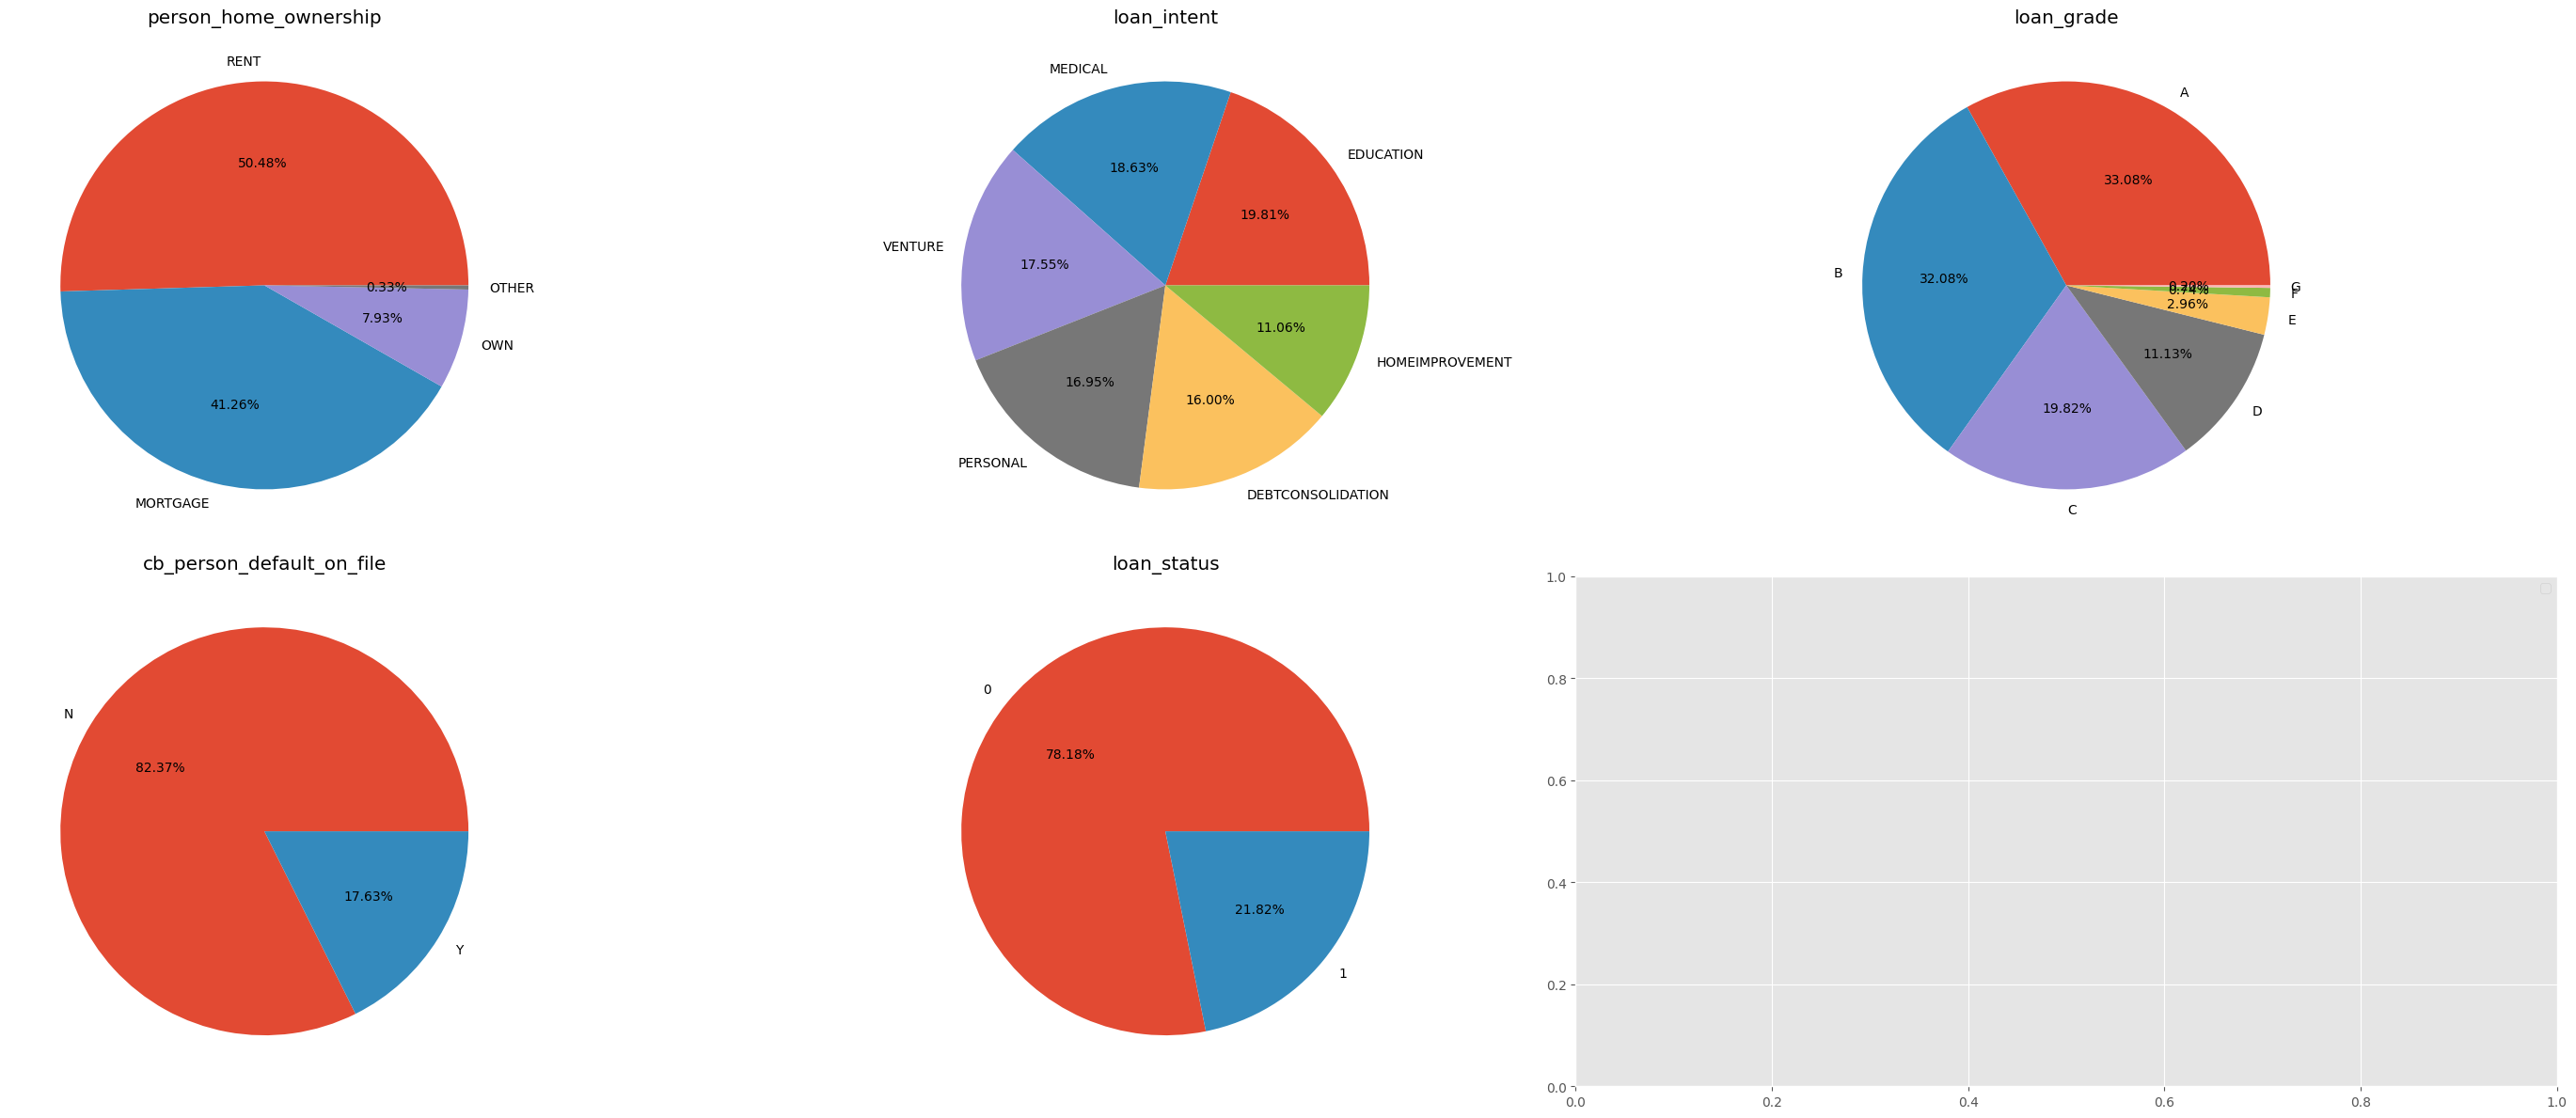

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(30,12))
for i,j in enumerate(categoricas):
  df[j].value_counts().plot(kind='pie',ax=ax[int(i/3),(i%3)],autopct='%1.2f%%')
  ax[int(i/3),(i%3)].set_title(j)
  ax[int(i/3),(i%3)].set_ylabel(None)
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Para las variables categóricas, se destaca que el 50.48% de los solicitantes vive en arriendo, el 41.26% tiene hipoteca, el 7.93% es propietario y el 0.33% pertenece a otras categorías. En cuanto al propósito del préstamo, las categorías más comunes son educación (19.81%), gastos médicos (18.63%) y emprendimientos (17.55%). En lo relacionado con la calificación crediticia, el 33.08% de los préstamos está clasificado como "A", el 32.08% como "B" y el 19.82% como "C", mientras que las categorías "D", "E", "F" y "G" representan solo el 15.02% en conjunto, indicando que la mayoría de los solicitantes presentan un riesgo bajo o moderado. Por otro lado, el 82.37% de los solicitantes no tiene un historial previo de incumplimientos, mientras que el 17.63% sí cuenta con este antecedente. Finalmente, en cuanto al estado del préstamo, el 78.18% de los solicitantes se encuentra al día con sus pagos, mientras que el 21.82% está en incumplimiento, esto nos señala que los datos se encuentran desbalanceados por lo que habrá que hacer un procesamiento adicional para el modelo.


# **Preparación de los datos**.

## Limpieza de datos.

In [ ]:
df.dropna(inplace=True)

Dado que no se puede obtener la tasa de interes y la antigüedad de las personas en su trabajo, se eliminan estos registros para la creación del modelo. Tampoco se usan técnicas de inputación dado que se puede generar un sesgo o alteración de la información

In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


En los datos se observa que hay inconsistencias en la antigüedad de las personas en su empleo con un máximo 123 años y en la edad máxima de 144 años.

In [ ]:
(df['person_age']>100).sum()

4

In [ ]:
(df['person_emp_length']>40).sum()

3

En el filtro anterior se observa que hay 4 personas que solicitan el préstamo con edades mayores a 100 años, esto puede indicar la presencia de varios datos erróneos. A su vez también aparecen 3 personas con antigúedades en su empleo mayores a 40 años, lo cual también indica posibles inconsistencias.

In [ ]:
#valor atípico
outlier_person_age=df[['person_age']].describe().loc['75%']+1.5*(df[['person_age']].describe().loc['75%']-df[['person_age']].describe().loc['25%'])
outlier_person_age

,0
person_age,40.5


In [ ]:
outlier_person_lenght=df[['person_emp_length']].describe().loc['75%']+1.5*(df[['person_emp_length']].describe().loc['75%']-df[['person_emp_length']].describe().loc['25%'])
outlier_person_lenght

,0
person_emp_length,14.5


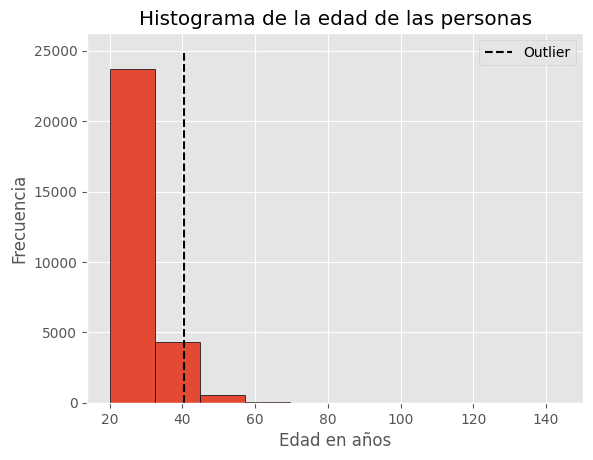

In [ ]:
plt.hist(df[['person_age']],edgecolor='black')
plt.title('Histograma de la edad de las personas')
plt.vlines(x=outlier_person_age.values,ymin=0,ymax=25000,linestyles='--',color='black',label='Outlier')
plt.legend()
plt.ylabel('Frecuencia')
plt.xlabel('Edad en años')
plt.show()

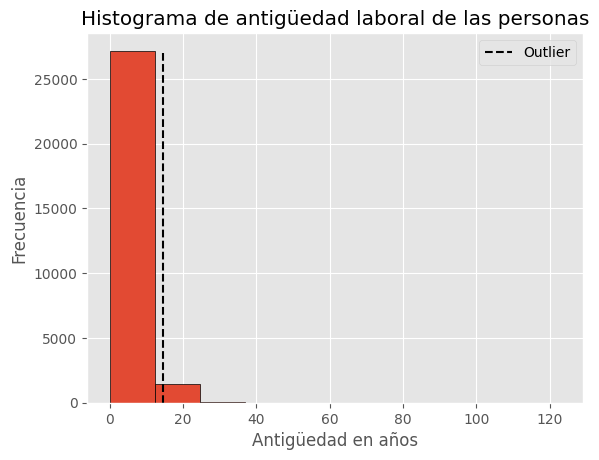

In [ ]:
plt.hist(df[['person_emp_length']],edgecolor='black')
plt.title('Histograma de antigüedad laboral de las personas')
plt.vlines(x=outlier_person_lenght.values,ymin=0,ymax=27000,linestyles='--',color='black',label='Outlier')
plt.legend()
plt.ylabel('Frecuencia')
plt.xlabel('Antigüedad en años')
plt.show()

Los valores atípicos de una distribución son definidos como **Outlier = Q3-1.5(Q3-Q1)**. Para este caso y evitar errores en la estimación del modelo con los posibles datos erróneos que tengan la variables de edad y antigüedad, tomamos aquellos valores que sean menores o iguales a la medida del valor atípico.

* Q3=75%

* Q1=25%

In [ ]:
df=df[(df['person_age']<=outlier_person_age.values[0])&(df['person_emp_length']<=outlier_person_lenght.values[0])]

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,26711.000000,2.671100e+04,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000
mean,26.647860,6.509132e+04,4.427801,9601.296282,11.049101,0.218262,0.170204,5.221594
std,4.412873,4.447729e+04,3.426811,6292.209411,3.223455,0.413074,0.106354,3.268844
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,25.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,29.000000,7.860000e+04,7.000000,12250.000000,13.480000,0.000000,0.230000,7.000000
max,40.000000,1.200000e+06,14.000000,35000.000000,23.220000,1.000000,0.830000,17.000000


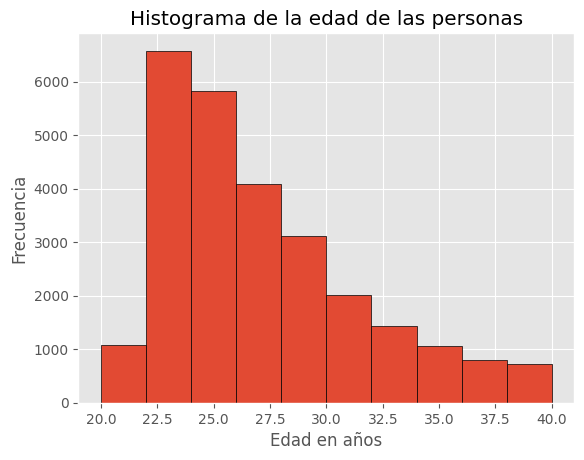

In [ ]:
plt.hist(df[['person_age']],edgecolor='black')
plt.title('Histograma de la edad de las personas')
plt.ylabel('Frecuencia')
plt.xlabel('Edad en años')
plt.show()

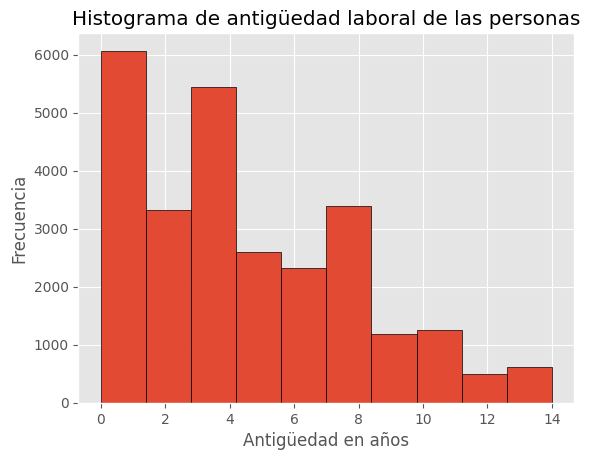

In [ ]:
plt.hist(df[['person_emp_length']],edgecolor='black')
plt.title('Histograma de antigüedad laboral de las personas')
plt.ylabel('Frecuencia')
plt.xlabel('Antigüedad en años')
plt.show()

Se observa que las distribuciónes de los datos están más concentradas en este momento para las variables de edad y antigüedad en el empleo, ya que, se eliminaron los registros con valores atípicos. Esto puede tener un impacto positivo en la creación del modelo.

In [ ]:
df.shape

(26711, 12)

Ahora hay 26.711 registros para la elaboración del modelo para Finanplus

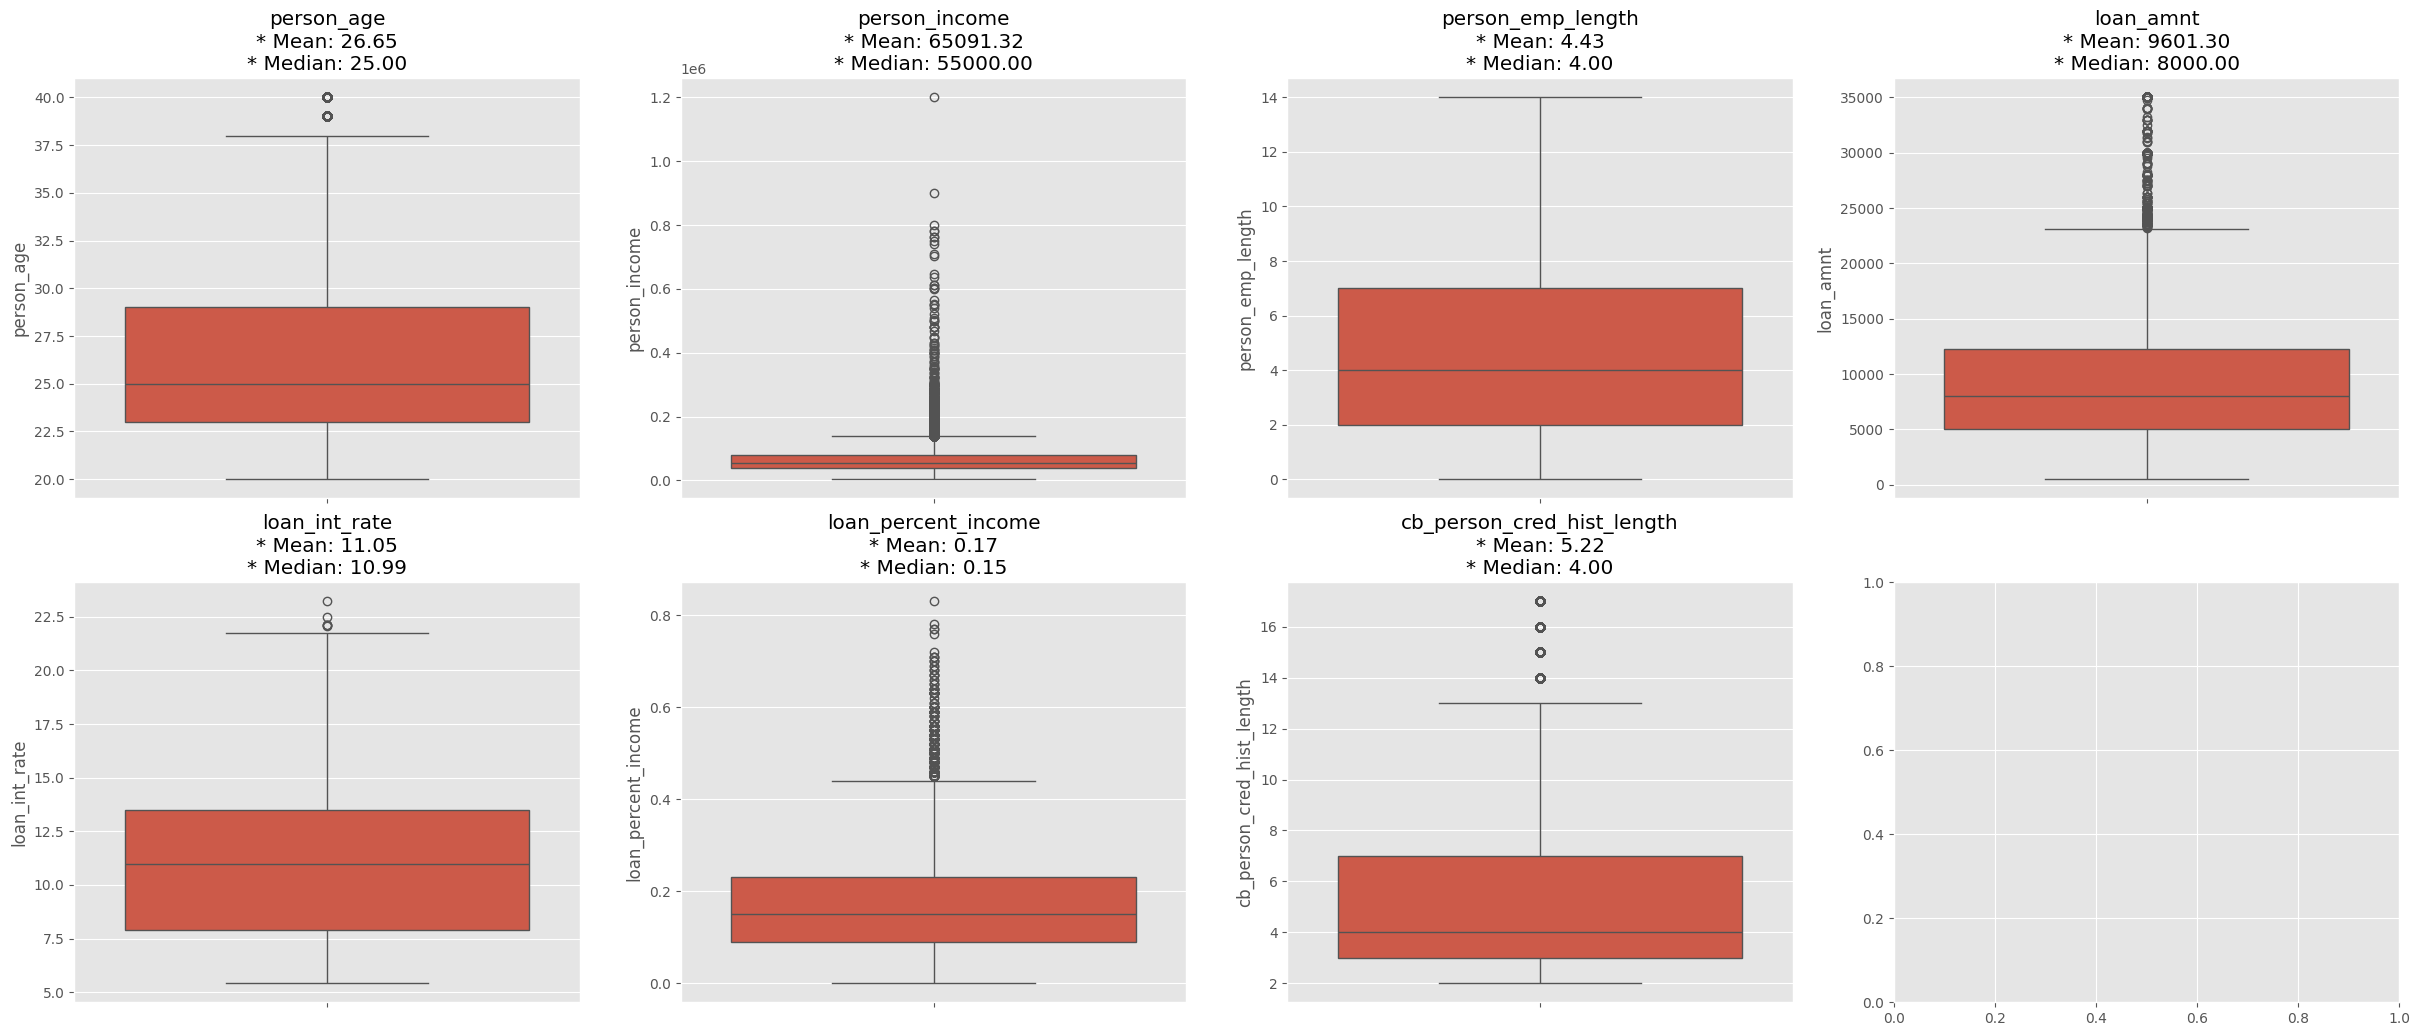

<Figure size 1000x1000 with 0 Axes>

In [ ]:
row=2
col=4
fig,ax=plt.subplots(row,col,figsize=(30,12))
plt.figure(figsize=(10,10))
for j,i in enumerate(variables_num):
  sns.boxplot(y=df[i],ax=ax[int(j/col),(j%col)])
  ax[int(j/col),(j%col)].set_title(f"{i}\n* Mean: {df[i].mean():.2f}\n* Median: {df[i].median():.2f}")
  ax[int(j/col),(j%col)].set_xlabel(None)

plt.tight_layout()
plt.show()

Se observa como se mencionó anteriormente que la distribuciones de edad y antigüedad están mucho mas concentradas, luego de la eliminar los valores atípicos y posibles valores erroneos. También se observa que las medidas de tendencia central no se ven muy afectadas para estas variables. En el caso de la edad paso de una media de 27.73 años a 26.65, la mediana pasó de 26 años a 25 años. En el caso de la antigüedad en el empleo pasó de una media de 4.79 años a 4.43 años y la mediana se mantuvo en 4 años.
Se observa también que los datos de la distribuciones y medidas de tendencia central para la otras variables numéricas permanecen iguales o bastante cercanos a su valor original.

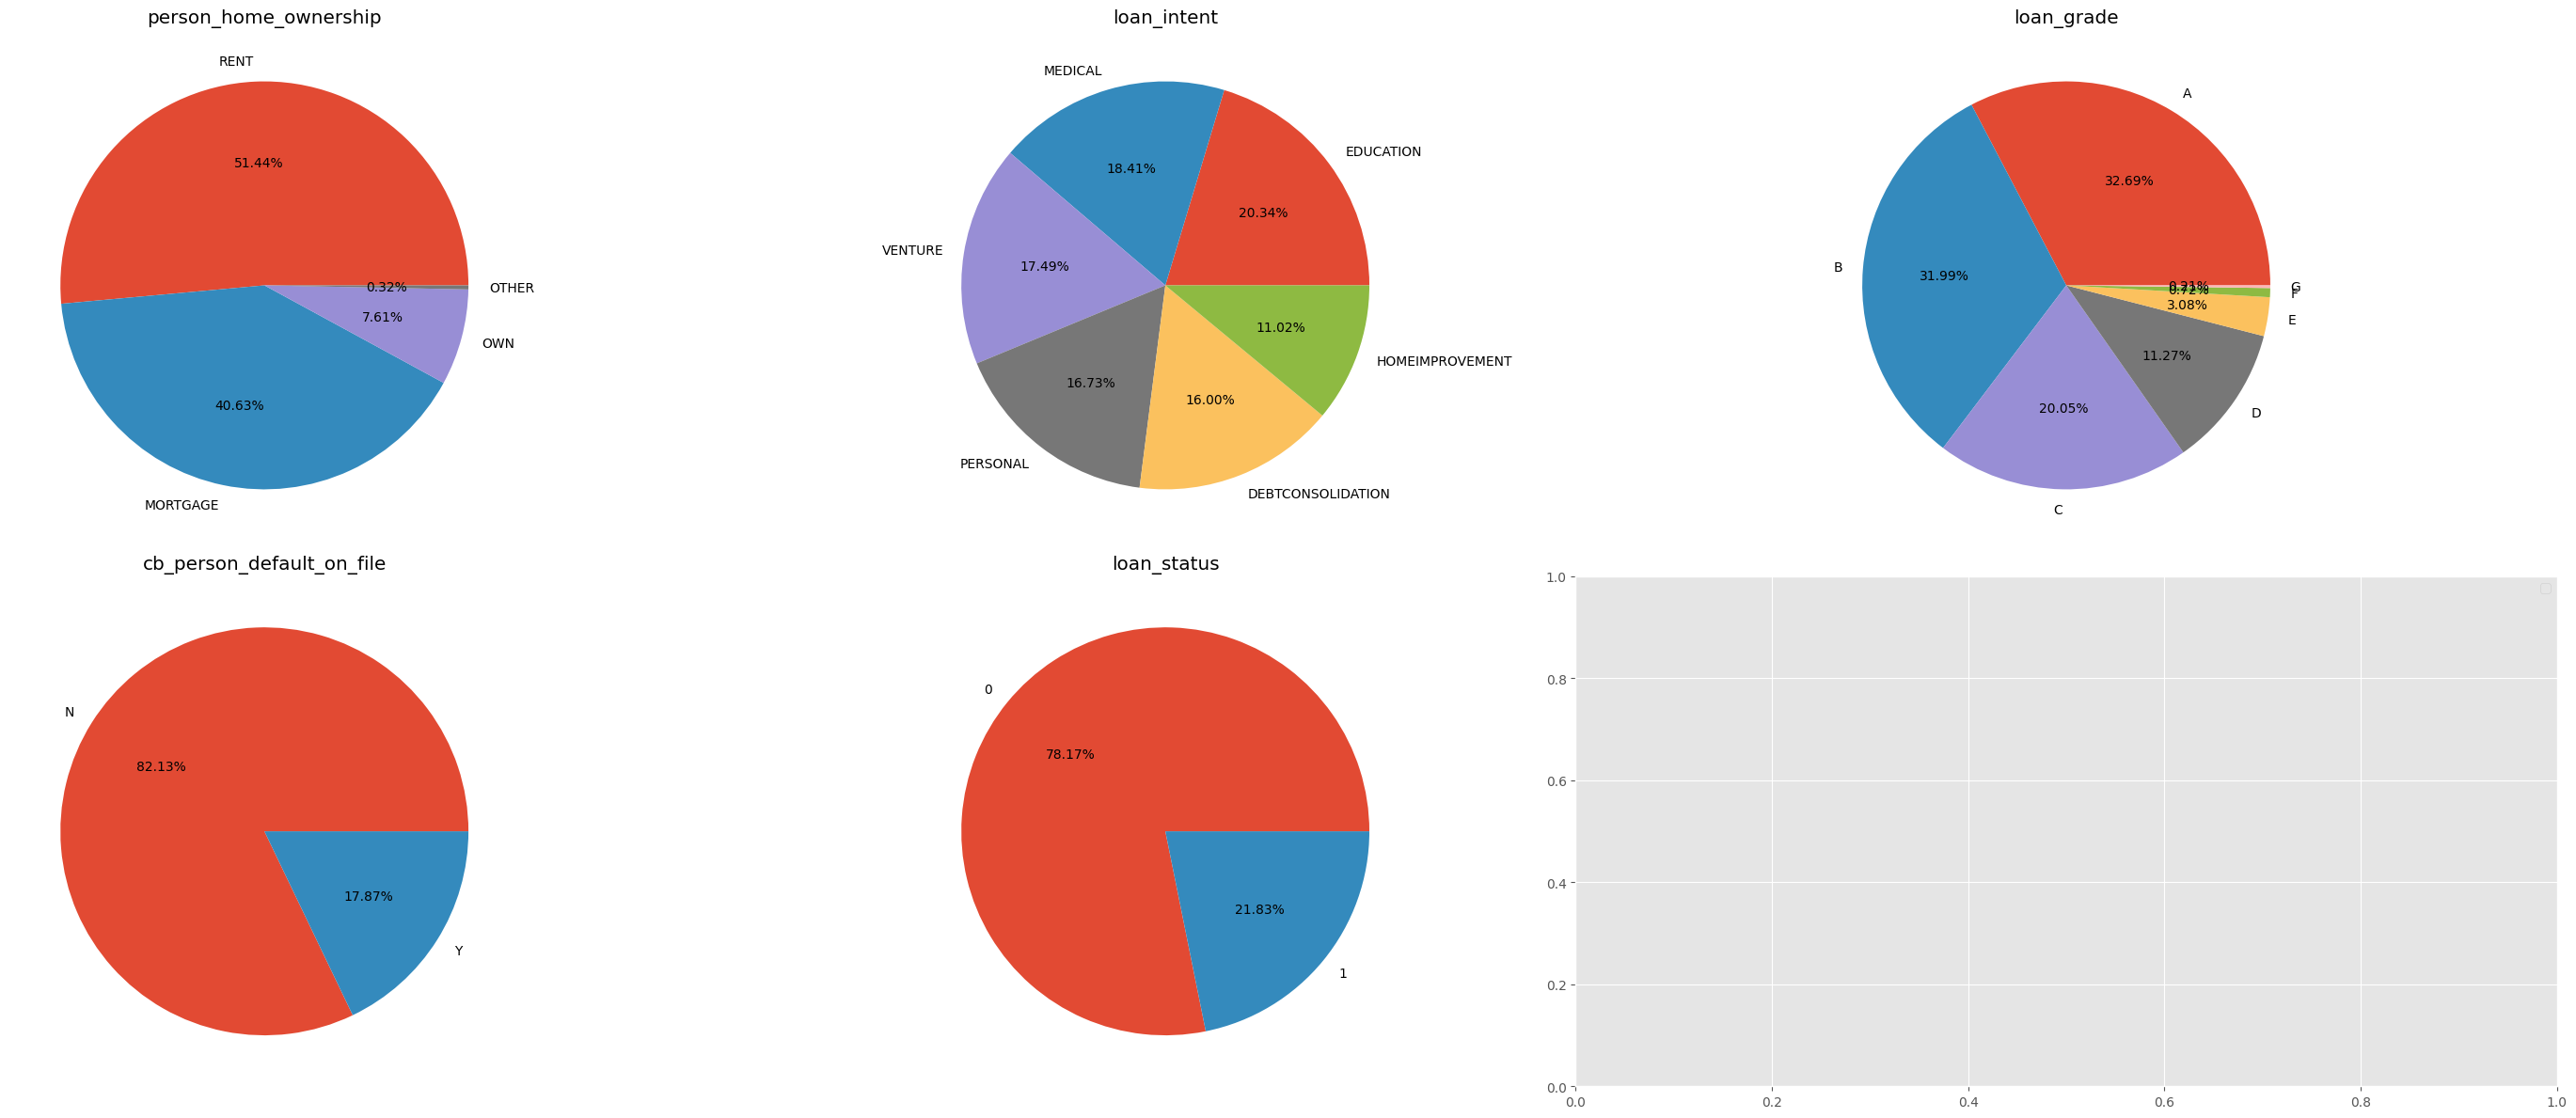

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(30,12))
for i,j in enumerate(categoricas):
  df[j].value_counts().plot(kind='pie',ax=ax[int(i/3),(i%3)],autopct='%1.2f%%')
  ax[int(i/3),(i%3)].set_title(j)
  ax[int(i/3),(i%3)].set_ylabel(None)
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Para la variables categóricas se observa que la eliminación de valores atípicos de la variable de edad y antigüedad no afectó la frecuencia relativa de aparición de cada grupo en las variables.

##**Procesamiento y transformación de atributos.**

In [ ]:
variables_num

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

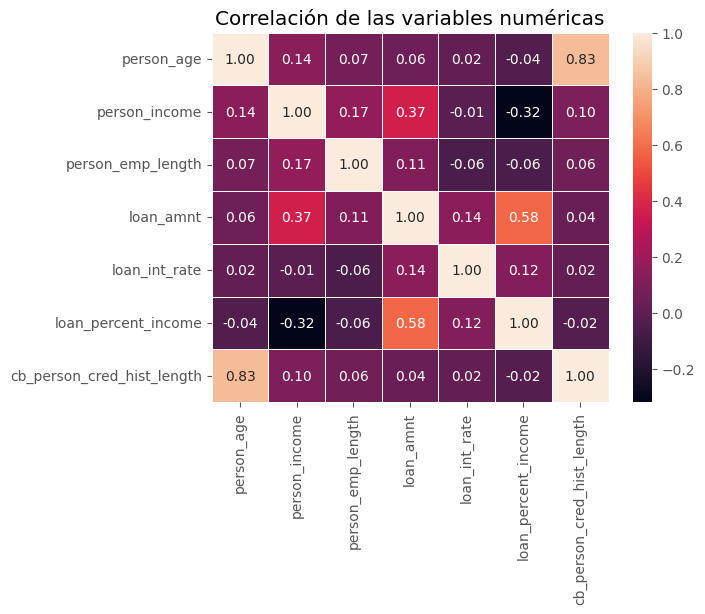

In [ ]:
sns.heatmap(df[variables_num].corr(),
            annot=True,
            linewidths=0.5,
            fmt='.2f')
plt.title('Correlación de las variables numéricas')
plt.show()

La matriz de correlaciones indica que el tiempo de historial de crédito de una persona (**cb_person_cred_hist_length**) puede esta altamente correlacionado con la edad de una persona (**person_age**). Por lo que, se puede considerar usar una variable entre estas dos para no ocasionar problemas de multicolinealidad.

### **Balanceo de muestra.**

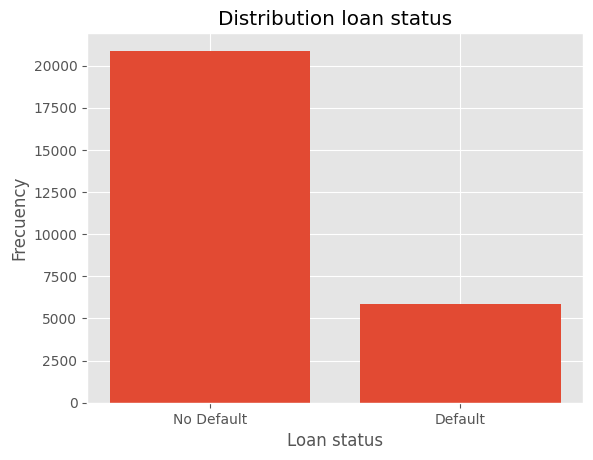

In [ ]:
plt.bar(df['loan_status'].unique(),df['loan_status'].value_counts())
plt.title('Distribution loan status')
plt.ylabel('Frecuency')
plt.xlabel('Loan status')
plt.xticks(df['loan_status'].unique(),['No Default','Default'])
plt.show()

In [ ]:
df[df['loan_status']==1].shape,df[df['loan_status']==0].shape

((5830, 12), (20881, 12))

Se observa que el número de registros de personas con no pago (5.830) son mucho menores que los registros con personas que pagan el crédito (20.881). Por esta razón, para que el modelo de clasificación no quede sesgado el grupo de mayor participación (las personas que si pagan), se van a equilibrar las muestras tomando de los 20.881 personas que si pagaron a tiempo, una muestra aleatoria de 5.830 registros.
Cabe señalar que, no se emplea balanceo por muestra sintético, para no generar sesgos con la generación de nuevas muestras.

In [ ]:
np.random.seed(42)
no_default=df[df['loan_status']==0].sample(n=5830)
default=df[df['loan_status']==1]
df_new=pd.concat([no_default,default],axis=0)
df_new.shape

(11660, 12)

In [ ]:
df_new.reset_index(drop=True,inplace=True)

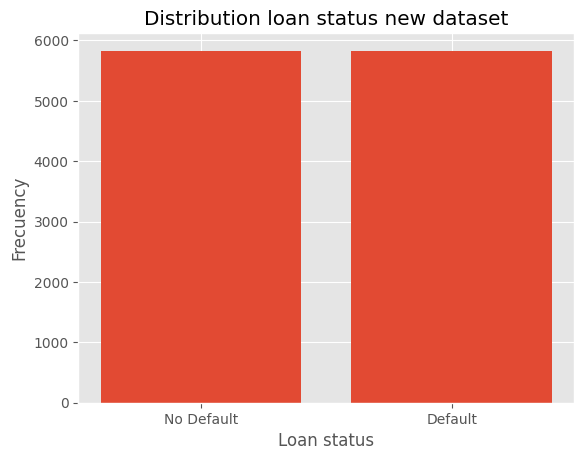

In [ ]:
plt.bar(df_new['loan_status'].unique(),df_new['loan_status'].value_counts())
plt.title('Distribution loan status new dataset')
plt.ylabel('Frecuency')
plt.xlabel('Loan status')
plt.xticks(df_new['loan_status'].unique(),['No Default','Default'])
plt.show()

En el gráfico se observa que ahora la variable objetivo **loan status** está balanceada en el conjunto de datos extraido

### **Inferencia de variables relevantes (selección de variables).**

#### Chi-Cuadrado.
La prueba de chi-cuadrado (χ²) es un test estadístico utilizado para comparar distribuciones observadas con distribuciones esperadas, para verificar si hay una relación significativa entre variables cualitativas.
La significancia manejada para la prueba en este caso es de 5%.

Las hipotesis son las siguientes:
* Hipótesis nula (H₀): Las dos variables son independientes (no hay relación entre ellas).
* Hipótesis alternativa (H₁): Las dos variables son dependientes (existe una relación entre ellas).

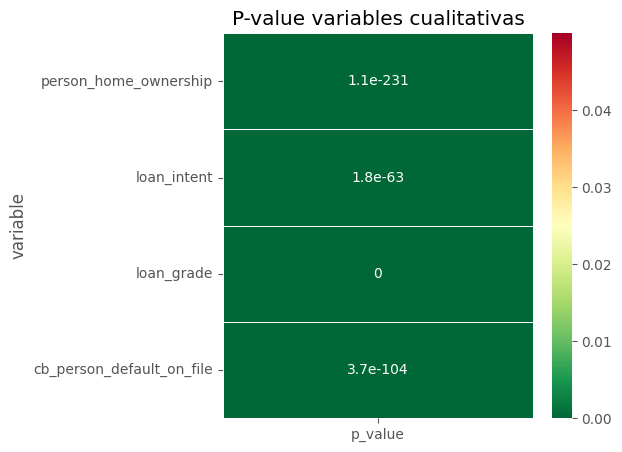

In [ ]:
p_val_cat=[]
sig_var=[]
for i in categoricas:
  if i!='loan_status':
    crosstab=pd.crosstab(df_new[i],df_new['loan_status'])
    stat,p,dof,expected=chi2_contingency(crosstab)
    if p<0.05:
      sig_var.append(i)
    p_val_cat.append({'variable':i,'p_value':p})

plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(p_val_cat).set_index('variable'),
            annot=True,
            vmin=0,
            cmap='RdYlGn_r',
            vmax=0.04999999,
            linewidths=0.5)
plt.title('P-value variables cualitativas')
plt.show()

El resultado de la prueba chi-cuadrado nos arroja que con un 95% de confianza las variables no son independientes, es decir, se rechaza la hioótesis nula. Lo que puede indicar que hay un relación entre esta variables y el estado de pago del préstamo (**loan_state**)

#### **T - Student.**
La prueba t de Student es un test estadístico utilizado para comparar las medias de dos grupos, con el fin de determinar si hay una diferencia significativa entre ellas.
La significancia tomada para esta prueba es de 5%.
Las hipótesis de la prueba son:
* Hipótesis nula (H₀): Las medias de los dos grupos son iguales, es decir, no hay diferencia significativa entre ellas.
* Hipótesis alternativa (H₁): Las medias de los dos grupos son diferentes, es decir, hay una diferencia significativa entre ellas.

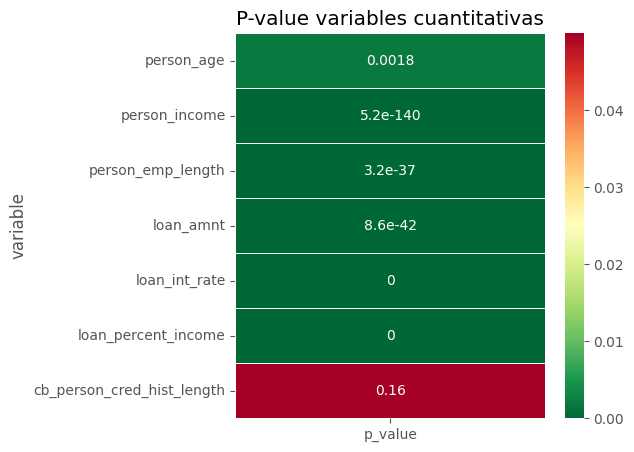

In [ ]:
p_val_num=[]

for i in variables_num:
    no_default_mean=df_new[df_new['loan_status']==0][i]
    default_mean=df_new[df_new['loan_status']==1][i]
    t=pg.ttest(no_default_mean,default_mean)
    p_val_num.append({'variable':i,'p_value':t.loc['T-test','p-val']})
    if t.loc['T-test','p-val']<0.05:
      sig_var.append(i)
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(p_val_num).set_index('variable'),
            annot=True,
            vmin=0,
            cmap='RdYlGn_r',
            vmax=0.04999999,
            linewidths=0.5)
plt.title('P-value variables cuantitativas')
plt.show()

De acuerdo con los resutados con un 95% de confianza las variables cuantitativas excepto la antigüedad del historial crediticio de una persona, guardan una relación significativa con el estado de pago del préstamo.

In [ ]:
df_new.drop(columns='cb_person_cred_hist_length',inplace=True)

### **Weight of evidence WOE (transformación).**


En este caso se realiza una transformación exclusiva para los casos de estimación de riesgo de crédito con la regresión logística. En esta transformación se discretizan las variables numéricas en intervalos.


In [ ]:
#creación de intervalos
cuali=df_new[sig_var].select_dtypes(exclude='object').columns

for i in cuali:
  df_new[i]=pd.cut(df_new[i],bins=5,right=False)


In [ ]:
#función para transformación de variables
def woe(df,var):
  var_woe=[]
  woe_values={}
  for i in var:
    group=df.groupby(i)['loan_status'].value_counts().unstack(fill_value=0)/df_new['loan_status'].value_counts()
    group['woe']=np.where((np.log(group[0]/group[1])==np.inf) | (np.log(group[0]/group[1])==-np.inf),0,np.log(group[0]/group[1]))
    woe_values[i]=group['woe']
    df[f'{i}_woe']=df[i].map(group['woe'])
  return woe_values,df

In [ ]:
woe_values,df_woe=woe(df_new,sig_var)

El valor de woe permite indicar la probabilidad de no pago de cada grupo de una variable. Los valor negativos indican que el grupo de una variable tiene más posibilidades de no pagar.

In [ ]:
len(woe_values)

10

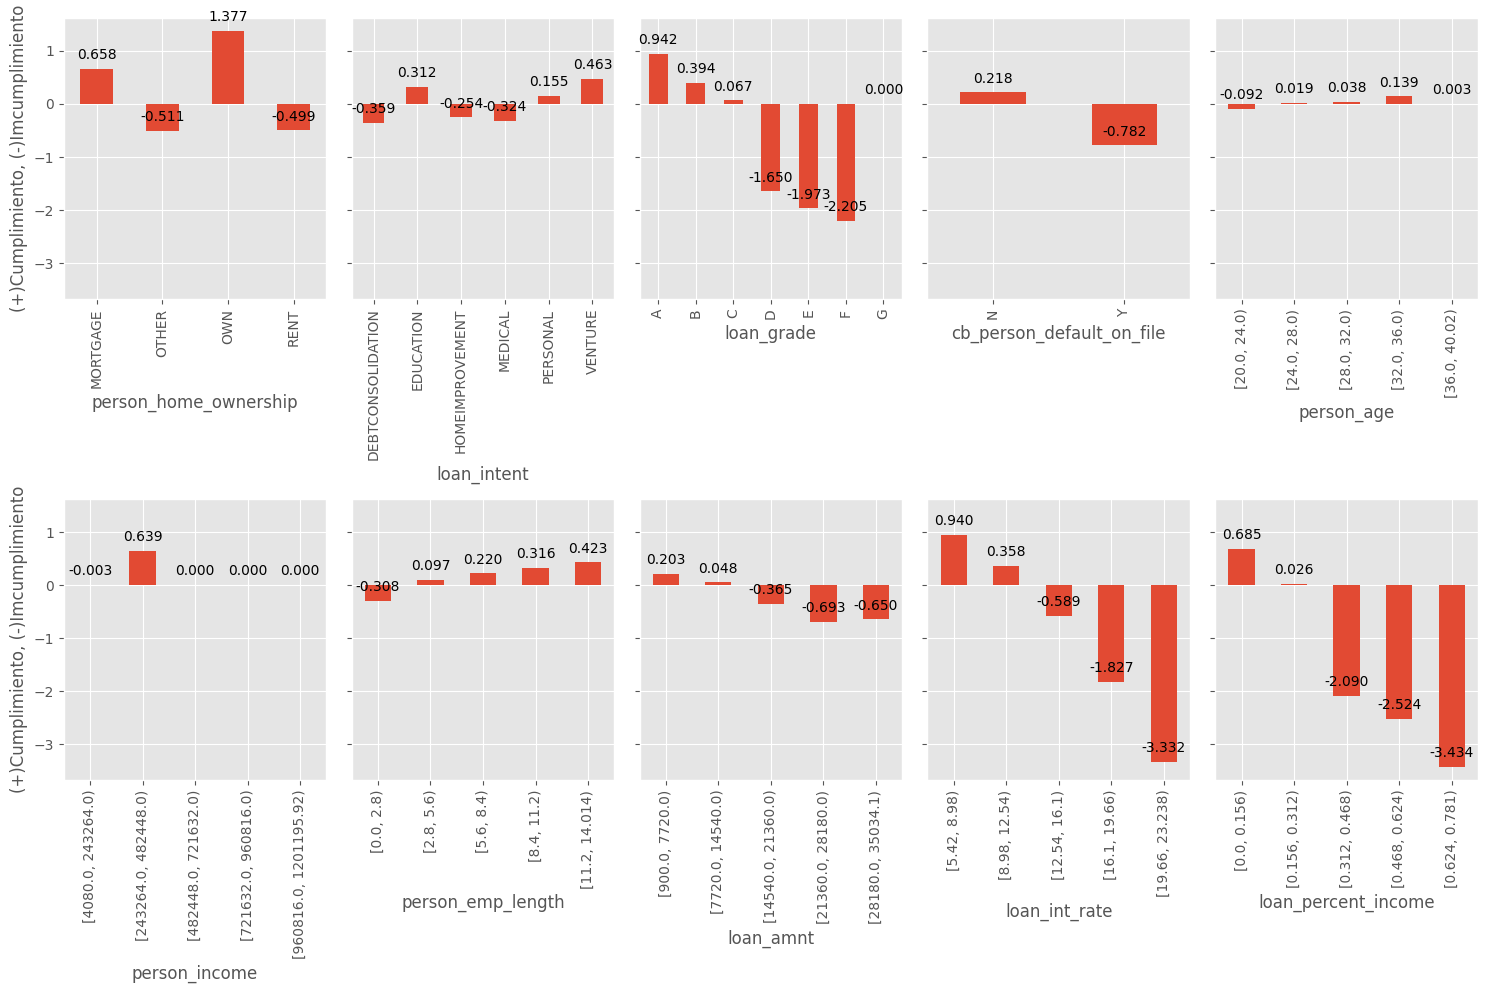

In [ ]:
fg,ax=plt.subplots(2,5,figsize=(15,10),sharey=True)
#for i,j in enumerate(woe_values
for j,i in enumerate(woe_values):
  woe_values[i].plot(kind='bar',ax=ax[int(j/5),j%5])
  ax[int(j/5),j%5].set_ylabel(f"(+)Cumplimiento, (-)Imcumplimiento")
  for p in ax[int(j/5), j%5].patches:
    ax[int(j/5), j%5].annotate(f'{p.get_height():.3f}',
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                xytext=(0, 5),
                                textcoords='offset points',
                                ha='center', va='bottom',
                                fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
for i in woe_values:
  print(f"\t{woe_values[i]}")
  print('\n')

	person_home_ownership
MORTGAGE    0.657939
OTHER      -0.510826
OWN         1.377390
RENT       -0.499087
Name: woe, dtype: float64


	loan_intent
DEBTCONSOLIDATION   -0.359172
EDUCATION            0.312481
HOMEIMPROVEMENT     -0.254268
MEDICAL             -0.323565
PERSONAL             0.154780
VENTURE              0.463412
Name: woe, dtype: float64


	loan_grade
A    0.942260
B    0.394110
C    0.066574
D   -1.650003
E   -1.972578
F   -2.204605
G    0.000000
Name: woe, dtype: float64


	cb_person_default_on_file
N    0.217664
Y   -0.782378
Name: woe, dtype: float64


	person_age
[20.0, 24.0)    -0.091765
[24.0, 28.0)     0.018519
[28.0, 32.0)     0.037845
[32.0, 36.0)     0.138655
[36.0, 40.02)    0.003180
Name: woe, dtype: float64


	person_income
[4080.0, 243264.0)       -0.003451
[243264.0, 482448.0)      0.639080
[482448.0, 721632.0)      0.000000
[721632.0, 960816.0)      0.000000
[960816.0, 1201195.92)    0.000000
Name: woe, dtype: float64


	person_emp_length
[0.0, 2.8)      

De acuerdo con los resultado es probable el no pago en los siguientes grupos para cada variable:
* En la variable de propietarios (**person_home_ownership**) es más probable que no haya pagos por parte de personas que viven en arriendo o que se encuentren en la categoria de otros.
* En la variable de la finalidad del préstamo (**loan_intent**) es más probable que no haya pagos por quiene lo piden con fines médicos, para mejorar el hogar y para consolidación de debitos.
* En la variable del grado del préstamo (**loan_grade**) es mas probale que no haya pago en la categorias de la D a la G.
* En la variable de histórico de no pagos (**cb_person_default_on_file**) es más probable que haya incumplimiento de personas que ya tienen una alerta en el histórico por no pago.
* En la variable de edad (**person_age**) es más probable que haya incumplimiento de pago en personas entre los 20 años a los 23 años.
* En la variable de antigüedad del empleo (**person_emp_length**) es más probable que incumplan pagos quienes tienen antigüedad menores a los 2.8 años.
* En la variable de ingresos (**person_income**) es más probable que incumplan en sus pagos personas con ingreso menores a los 243.264.
* En la variable de monto de préstamo (**loan_amnt**) es más probable que haya incumpimiento cuando el monto del préstamo es mayor o igual a 14.540.
* En la variable del interés del préstamos (**loan_in_rate**) cuando la tasa de interés calculada por el monto del préstamo es mayor o igual a 12.54% hay altas probabilidades de incumplimiento.
* En la variable del préstamo divida por los ingresos anuales de la persona (**loan_percent_income**) cuando la participación del monto del préstamo sobre los ingresos anuales es mayor o igual al 31.2% hay altas probabilidades de incumplimiento.

In [ ]:
df_woe.drop(columns=sig_var,inplace=True)

In [ ]:
X=df_woe.drop(['loan_status'],axis=1)
y=df_woe['loan_status']

In [ ]:
#Se emplea para este caso un conjunto de prueba del 20% de los datos
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Análisis de datos.**

## **Modelado.**

In [ ]:
model=LogisticRegression(max_iter=1000,fit_intercept=False)
model.fit(x_train,y_train)

LogisticRegression(fit_intercept=False, max_iter=1000)

In [ ]:
odds=np.exp(model.coef_)

In [ ]:
odds=pd.DataFrame(data=odds,columns=x_train.columns,index=['Coeficientes WOE']).T
odds.sort_values(by='Coeficientes WOE',ascending=True,inplace=True)

In [ ]:
odds

,Coeficientes WOE
loan_intent_woe,0.273249
loan_percent_income_woe,0.274700
loan_grade_woe,0.353204
person_home_ownership_woe,0.469725
person_age_woe,0.560002
person_emp_length_woe,0.763140
loan_int_rate_woe,0.826861
cb_person_default_on_file_woe,0.936739
person_income_woe,1.055760
loan_amnt_woe,3.479069


Los WOE positivos indicaban mayor probabilidad de cumplimiento, estos al ser logaritmos naturales y al introducirlos en la función exponencial toman valores mayores a 1. Por otra parte aquellos que indicaban mayor probabilidad de incumplimiento en logaritmo natural eran negativos, por lo que al introducirlos en la función exponencial son valores entre 0 y 1.
Los valores más bajos se asocian a variables que inciden en una mayor probabilidad de incumplimiento. Por lo que de acuerdo con el modelo la variable de mayor incidencia en el incumpimiento de pago es la finalidad del préstamo (**loan_intent_woe**).

In [ ]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1201
           1       0.79      0.75      0.77      1131

    accuracy                           0.78      2332
   macro avg       0.78      0.78      0.78      2332
weighted avg       0.78      0.78      0.78      2332



In [ ]:
matrix=confusion_matrix(y_test,model.predict(x_test))

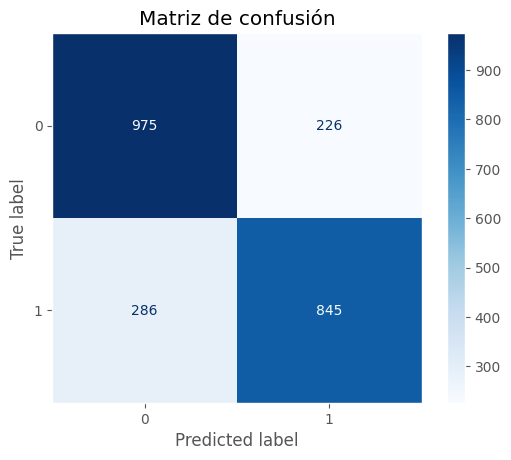

In [ ]:
ConfusionMatrixDisplay(matrix).plot(cmap='Blues')
plt.grid(False)
plt.title('Matriz de confusión')
plt.show()

### **Definición de función Score.**

Para este caso el puntaje crediticio va a ser construido con un valor decisor de 600 puntos, por lo que todos préstamos en los que el score sea mayor o igual a 600 se espera que cumpla con los pagos. Mientras que, los score menores a 600 indican riesgo de imcumplimiento por lo cual no se podrá otorgar el crédito.



La formula es la siguiente:

* Score = Offset - (∑i
​Coefi*Xi) * Factor

* Factor = Puntos por Doble Odds/ln(2)

* Offset = Puntaje de referencia deseado - ln(odds referencia) * Factor

Offset: Define una escala.

Factor: Transforma la escala
logarítmica en un puntaje. Para este caso definimos un factor de 50 puntos si los odds se duplican, es decir, cuando la probabilidad de buen pagador se duplica.


Coefi: Coeficiente de la variable i.

Xi: Valor de la característica i.

In [ ]:
#relación del dataset original clientes buenos/malos
print(y_train.value_counts())
print(4699/4629)

loan_status
1    4699
0    4629
Name: count, dtype: int64
1.0151220565996975


In [ ]:
def score(x):
  scale=600
  factor=50/np.log(2)
  offset=scale-np.log(1)*factor
  score=offset-(np.dot(model.coef_,x[['person_home_ownership_woe', 'loan_intent_woe', 'loan_grade_woe',
       'cb_person_default_on_file_woe', 'person_age_woe', 'person_income_woe',
       'person_emp_length_woe', 'loan_amnt_woe', 'loan_int_rate_woe',
       'loan_percent_income_woe']])*(factor))
  return score[0]

In [ ]:
#prediction
df_woe['pred_load_status']=model.predict(df_woe[['person_home_ownership_woe', 'loan_intent_woe', 'loan_grade_woe',
       'cb_person_default_on_file_woe', 'person_age_woe', 'person_income_woe',
       'person_emp_length_woe', 'loan_amnt_woe', 'loan_int_rate_woe',
       'loan_percent_income_woe']])
#probability
df_woe['probability_default_load_status']=model.predict_proba(df_woe[['person_home_ownership_woe', 'loan_intent_woe', 'loan_grade_woe',
       'cb_person_default_on_file_woe', 'person_age_woe', 'person_income_woe',
       'person_emp_length_woe', 'loan_amnt_woe', 'loan_int_rate_woe',
       'loan_percent_income_woe']])[:,1]

In [ ]:
df_woe['Score']=df_woe.apply(score,axis=1)

In [ ]:
df_woe_mask=df_woe[df_woe['pred_load_status']==df_woe['loan_status']]
df_woe_mask.groupby('loan_status')['Score'].agg(['min','max'])

,min,max
loan_status,,
0,600.232328,900.166603
1,74.934382,599.663033


In [ ]:
df_woe_mask['loan_status_label']=df_woe_mask['loan_status'].map({0:'No default',1:'Default'})

In [ ]:
fig=px.histogram(df_woe_mask,
                 x='Score',
                 y='probability_default_load_status',
                 marginal='box',
                 color='loan_status_label',
                 title='Scorecard Finanplus',
                 histfunc='avg',
                 labels={'probability_default_load_status':'probability default'})
fig.update_layout(title_font_size=30)
fig.show()

Se realizó la prueba del score con los valores pronosticados correctamente, es decir, que para aquellos donde la predicción es igual al valor real, con el fin de obtener la puntuación crediticia definida para cada uno de los segmentos, evitando los puntajes de los falsos positivos y los falsos negativos.

Se puede observar en el gráfico que las puntuaciones de los clientes a quienes no se les puede otorgar crédito por incumplimiento, están entre los 74 puntos a los 599 puntos y el score del 50% de los clientes que incumplen con los pagos es menor o igual a 447.19 puntos. Mientras que, las puntuaciones de los clientes a quienes se les puede otorgar crédito, están en un rango entre 600 y 900; donde el 50% de los clientes llega a tener una puntuación menor o igual a 703.38. Además, se observa, que la probabilidad de incumplimiento promedio para los distintos grupos de scorecard, disminuye a medida que su puntuación aumenta, lo que refleja un buen funcionamiento de la función desarrollada para la asignación del scorecard en Finanplus.

## **Evaluación.**
El modelo ha sido desarrollado satisfactoriamente para Finanplus.

El modelo entrenado tiene una precisión del 79% al identificar a las personas que incumplen los pagos. Mientras que para identificar a aquellas personas que cumplen con los pagos tiene un precisión del 77%. Respecto a los aciertos del modelo, con los datos de prueba, fue capaz de acertar con el 78% de los datos.

La tasa de falsos positivos es de 19% y la de falsos negativos de 25%. Dismnuir la tasa de falsos negativos puede llegar a ser un punto de mejora para futuras versiones.

La función de asginación del riesgo de crédito se creó adecuadamente con un punto de corte de 600, en la cual, los registros de aquellas personas que no se le puede otorgar el crédito por riesgo de incumplimiento está en un rango de 74 y 599. Por otra parte, el segmento de las personas a las que se les puede otorgar crédito tienen un rango de puntaje crediticio de 600 a 900.



# **Conclusiones.**
El modelo ha sido desarrollado de manera exitosa para Finanplus. Se estima que permitirá calcular correctamente el riesgo crediticio de los solicitantes de crédito en el 78% de las ocasiones.

Se cumplieron los objetivos del proyecto para Finanplus, se entrenó una regresión logistica que permite estimar la probabilidad incumplimiento con una precisión del 79% para las personas morosas.También, a partir de los coeficientes estimados y definiendo un punto de corte para una función matemática de puntuación crediticia se pudo calcular el puntaje del solicitante. Además, con los parámetros de la función y los datos, se estableció que en un rango de 74 y 599 puntos están aquellos solicitantes que no se les puede otorgar el crédito por riesgos de incumplimiento, mientras que aquellos que se están entre un rango de 600 a 900 puntos tienen posibilidad de cumplir con el pago de la deuda por el crédito.

A partir de los análisis se puede afirmar que el perfil general de un cliente con alta probabilidad de incumplimiento, se caracteriza por ser una persona joven, con una edad comprendida entre los 20 y 23 años, que vive en arriendo o en una categoría de vivienda no convencional. Su empleo es reciente, con una antigüedad laboral inferior a 2.8 años, y percibe un ingreso anual menor a 243.264. Ha solicitado un préstamo con una finalidad como gastos médicos, mejoras en el hogar o consolidación de deudas, y su calificación crediticia se encuentra en los niveles D a G. Además, cuenta con un historial previo de incumplimiento en su historial crediticio. El monto del préstamo solicitado es igual o superior a 14.540, con una tasa de interés superior al 12.54% y una carga financiera elevada, donde el préstamo representa al menos el 31.2% de sus ingresos anuales. Estas condiciones, en conjunto, incrementan significativamente la posibilidad de que el cliente no pueda cumplir con sus obligaciones financieras.

Finalmente, cabe mencionar que el modelo es suceptible de mejoras en futuras versiones para disminuir los falsos negativos del 25% (ya que el principal interés es evitar otorgar préstamos a clientes que incumplan el pago de la deuda). Esto se puede realizar con un fuente de datos con más variables o con datos que presenten una mayor variación.